<img src="seekingalpha.png" style="float: left; margin: 20px; height: 55px">

# Notebook 4- Exploratory Data Analysis

### _EDA for Stocks DataFrame compiled in Notebook 3_

---
### Notebook Summary 
> - Checking for null or duplicated values
> - Datatype conversion utilizing the Pandas "datetime" functionality
> - Investigating feature frequencies, distributiins, and summary statistics 
> - Investigating actual market performance for Long and Short Portfolios 

---
### _Importing Necessary Libraries_
---

In [1]:
# EDA/Data Mining
import pandas as pd
import numpy as np


# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Setting style
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### _Importing "Stocks" Dataframe_
----

In [2]:
stocks = pd.read_csv('stocks.csv')  # Compiled via csv download in Notebook 3

In [3]:
stocks.head(3)  # Inspecting head

,Date,Close,Tickers
0,3/2/15,129.089996,AAPL
1,3/3/15,129.360001,AAPL
2,3/4/15,128.539993,AAPL


### _Importing "Long Portfolio" & "Short Portfolio"_
----

In [4]:
# Compiled via EDA in Notebook 2

long_portfolio = pd.read_csv("long_portfolio.csv") 
short_portfolio = pd.read_csv('short_portfolio.csv') 

### _Checking for null or duplicated data_
----

In [5]:
stocks.isnull().sum()   # Checking for missing data

Date       0
Close      0
Tickers    0
dtype: int64

In [6]:
stocks.duplicated().sum()  #  Checking for duplicated data 

0

### _Converting Datatypes_
---
> - 'Tickers' is categorical data, meaning there is no need to convert from an object datatype
> - 'Close' is numerical data, meaning there is no need to convert from a float datatype 
> - 'Time' will need to be converted to a datetime object in order to interpret data with a datetime functionality 
    - Additionally, week and month number will be extracted from the datetime object to analyze prices on a weekly and monthly basis 

In [7]:
stocks.dtypes  # Inspecting datatypes 

Date        object
Close      float64
Tickers     object
dtype: object

#### Converting 'Date' to datetime object

In [10]:
stocks['Date'] = pd.to_datetime(stocks['Date']) # Converting to Pandas datetime object

In [11]:
stocks['Week'] = stocks['Date'].dt.week  # Accessing week # and storing as new dataframe column 
stocks['Month'] = stocks['Date'].dt.month  # Accessing month # and storing as new dataframe column 

### _Investigating Summary Statistics_
---
### What is the scope of the "Stock" data collected?
> - There are an ample amount of observations present for the construction and training of machine learning algorithms 
> - The feature set - namely 'Tickers' - is highly diversified. Due to lack of time and computational power, narrowing down its scope through investigating distributions and frequencies will be crucial. 

In [12]:
print("="*45)
print('Number of observations: ' ,len(stocks))
print('Number of stock tickers referenced: ', len(stocks['Tickers'].value_counts()))

Number of observations:  5270
Number of stock tickers referenced:  10


In [13]:
print("="*45)
print('Lowest Closing Price: $', stocks['Close'].values.min())
print('Highest Closing Price: $', stocks['Close'].values.max())

Lowest Closing Price: $ 11.16
Highest Closing Price: $ 886.5399779999998


### What is the distribution for closing prices?
- Both graphs below demonstrate the majority of stocks in our dataset having low closing prices, best exlemplified by the skew of the histogram

(array([0]), <a list of 1 Text yticklabel objects>)

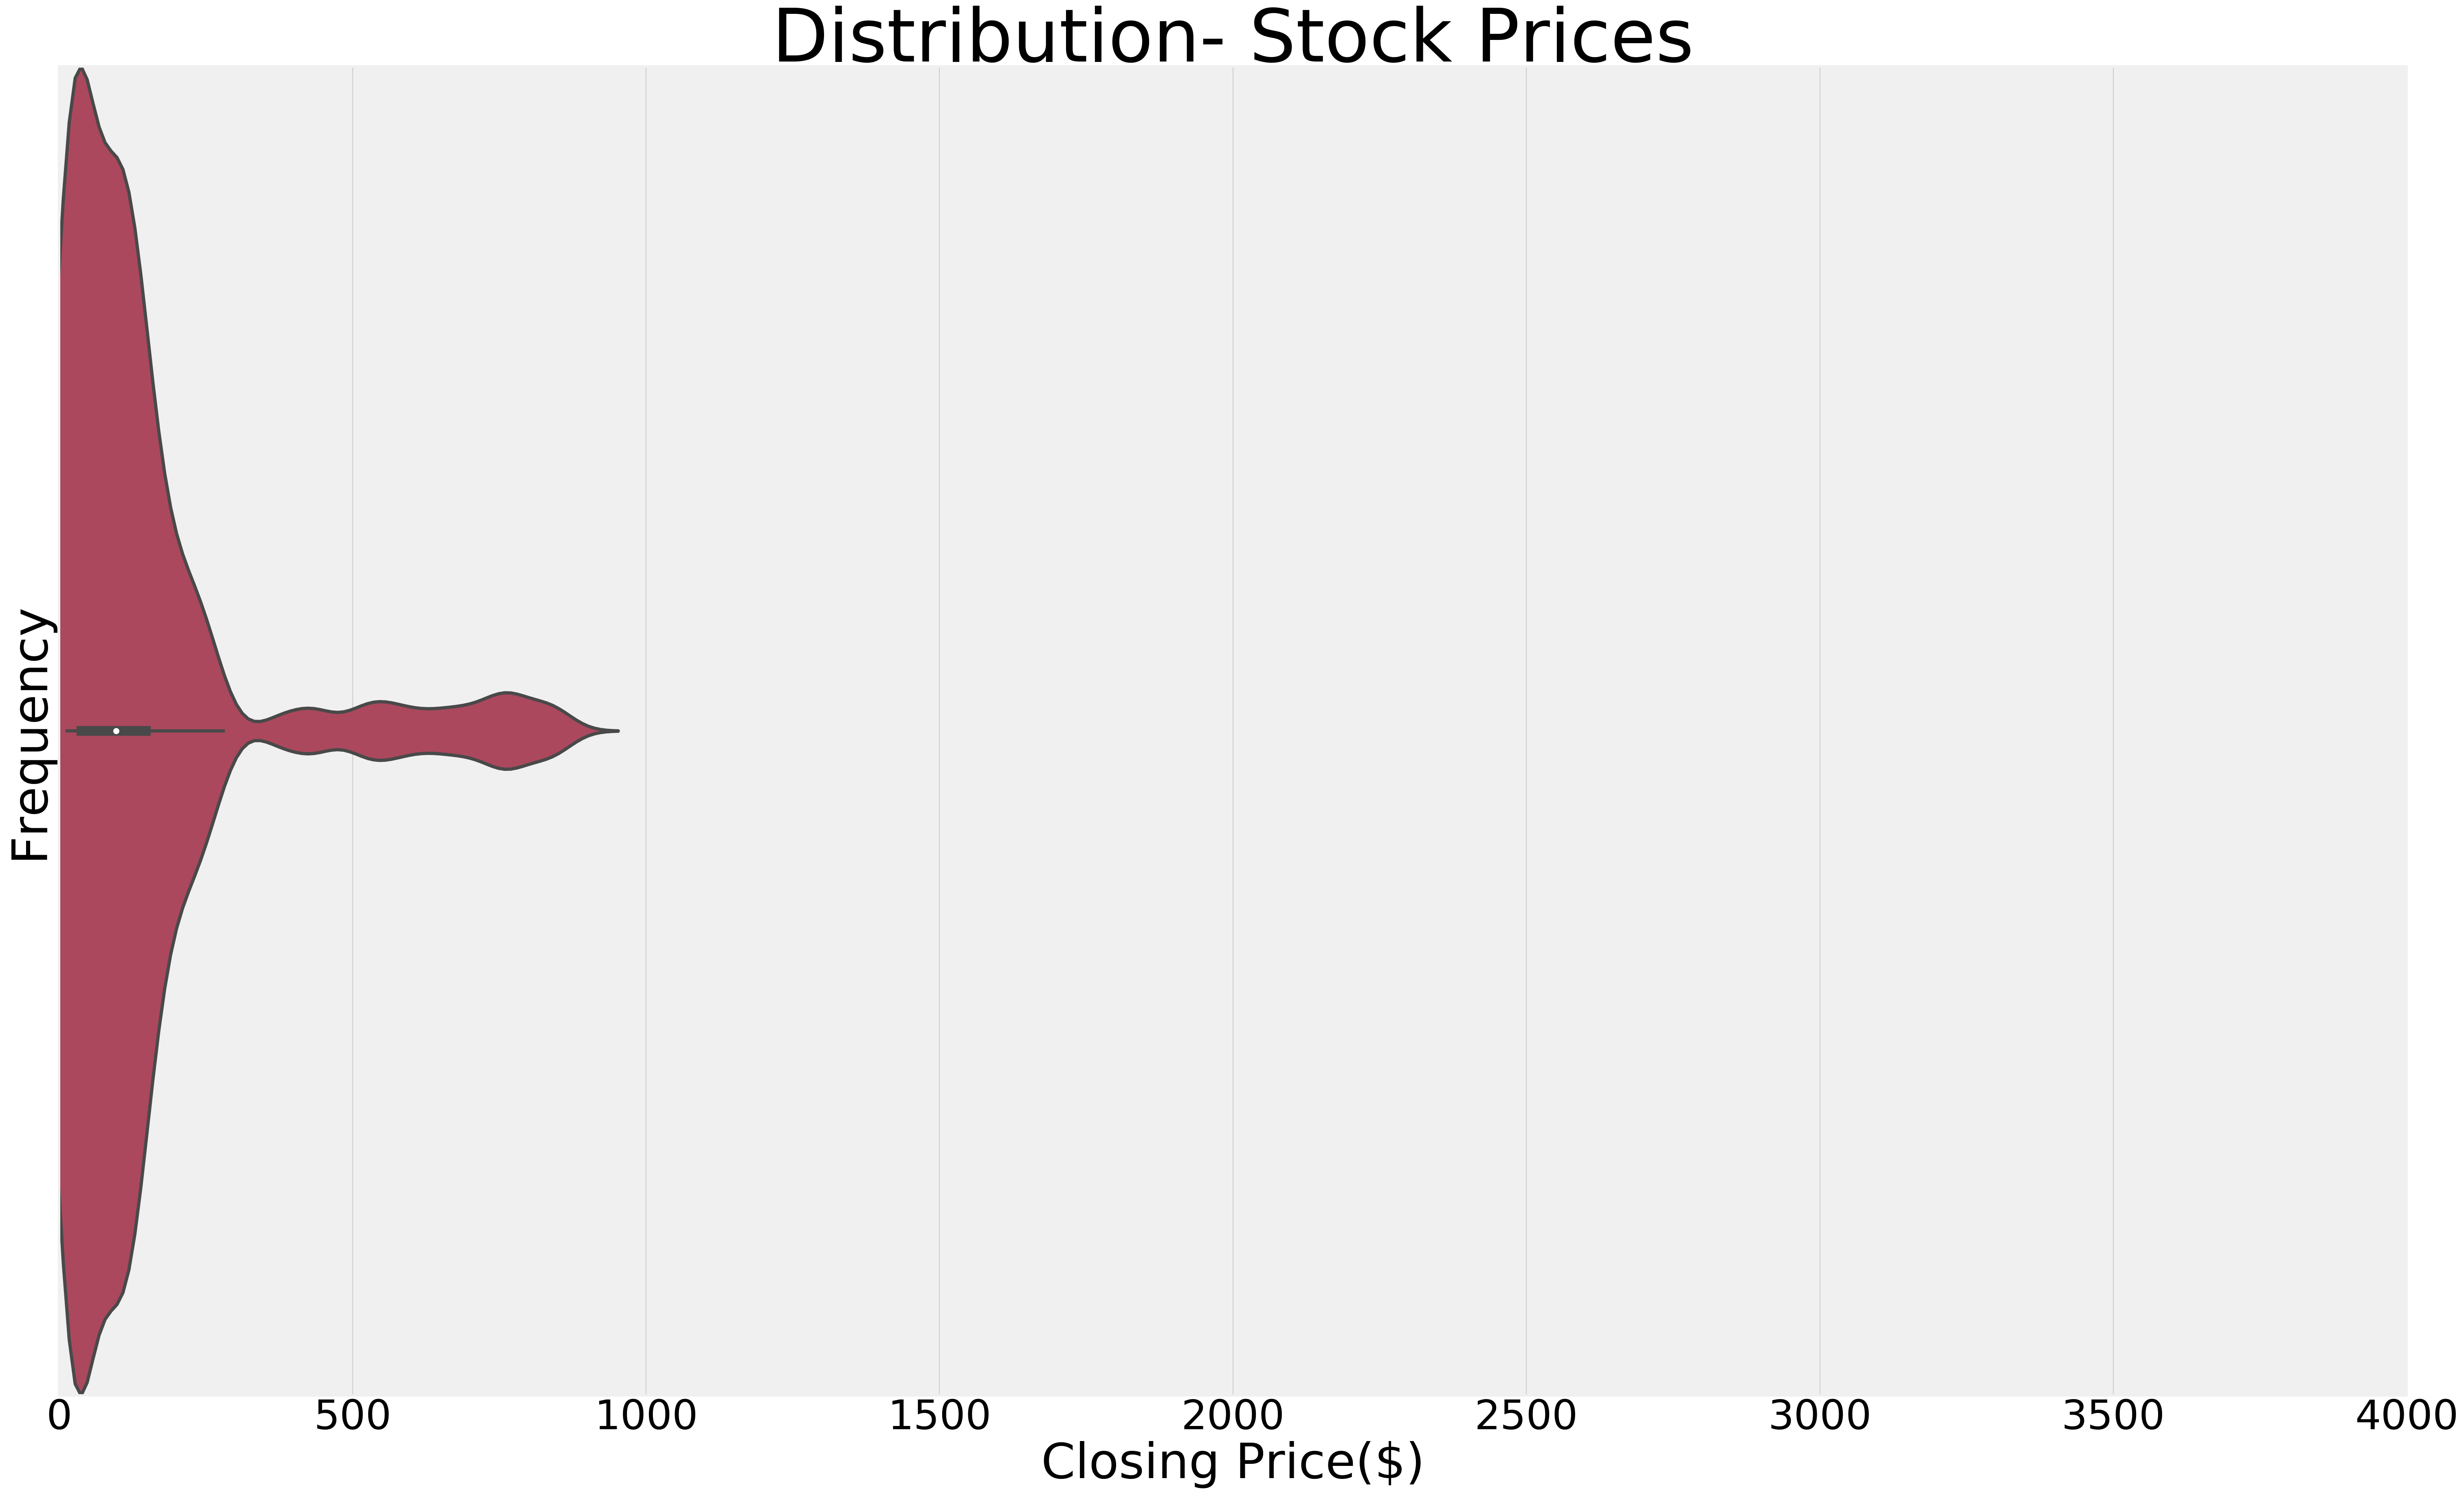

In [14]:
plt.figure(figsize=(46,30))

sns.violinplot(stocks['Close'],palette='inferno',width=1)
plt.xlim(0,4000)
plt.xlabel('Closing Price($)',fontsize=60)
plt.ylabel('Frequency',fontsize=60)
plt.title('Distribution- Stock Prices',fontsize=90)
plt.xticks(fontsize=50)
plt.yticks(fontsize=22)

(array([0.   , 0.002, 0.004, 0.006, 0.008, 0.01 , 0.012, 0.014, 0.016]),
 <a list of 9 Text yticklabel objects>)

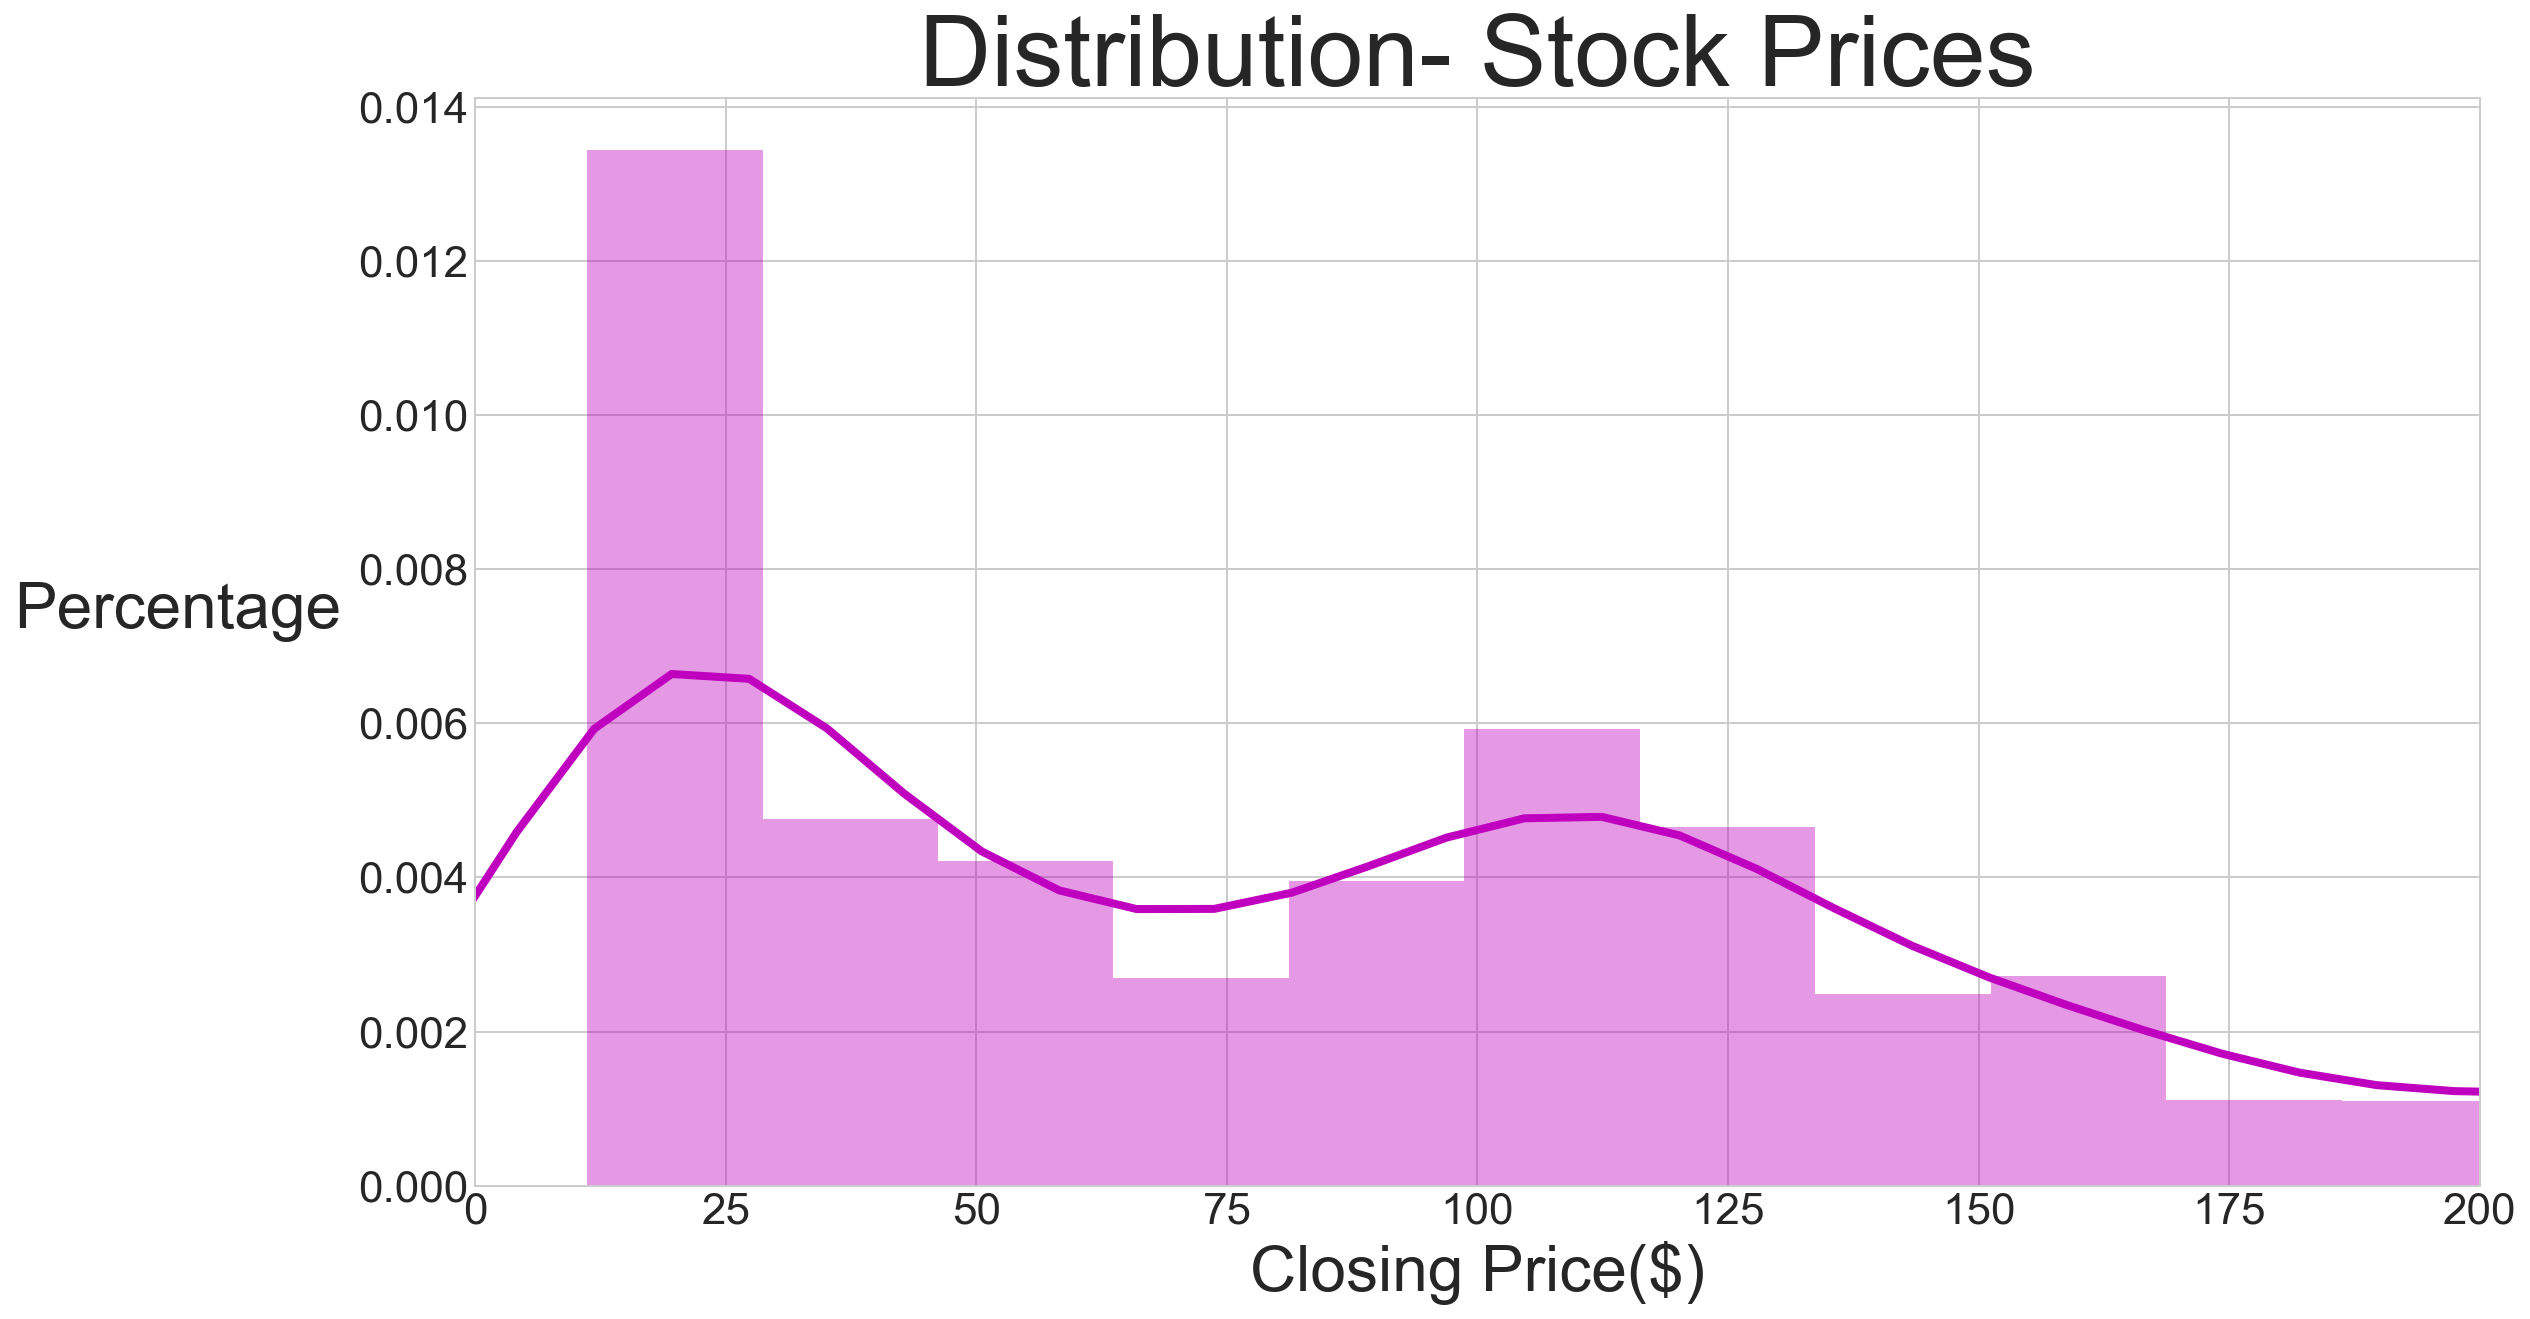

In [16]:
sns.set_style('whitegrid')
sns.despine()

d = stocks['Close']

plt.figure(figsize=(16,10))
sns.distplot(d, color='m')

plt.xlabel('Closing Price($)',fontsize=32)
plt.ylabel('Percentage',fontsize=32,rotation=0,labelpad=90)
plt.xlim(0,200)
plt.title('Distribution- Stock Prices',fontsize=50)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

### What stocks have the highest closing prices?

In [17]:
avg_close = stocks.groupby('Tickers')['Close'].mean().head(40)
avg_close = avg_close.sort_values(ascending=False)

print('Stock Tickers with Highest Closing Prices : ')
print('===========================================')
print(avg_close)

Stock Tickers with Highest Closing Prices : 
Tickers
AMZN    636.154365
TSLA    224.855370
IBM     155.201063
AAPL    114.194364
FB      108.449374
GILD     91.641917
MSFT     53.020740
GE       29.062372
BAC      16.899374
F        13.525047
Name: Close, dtype: float64


(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text yticklabel objects>)

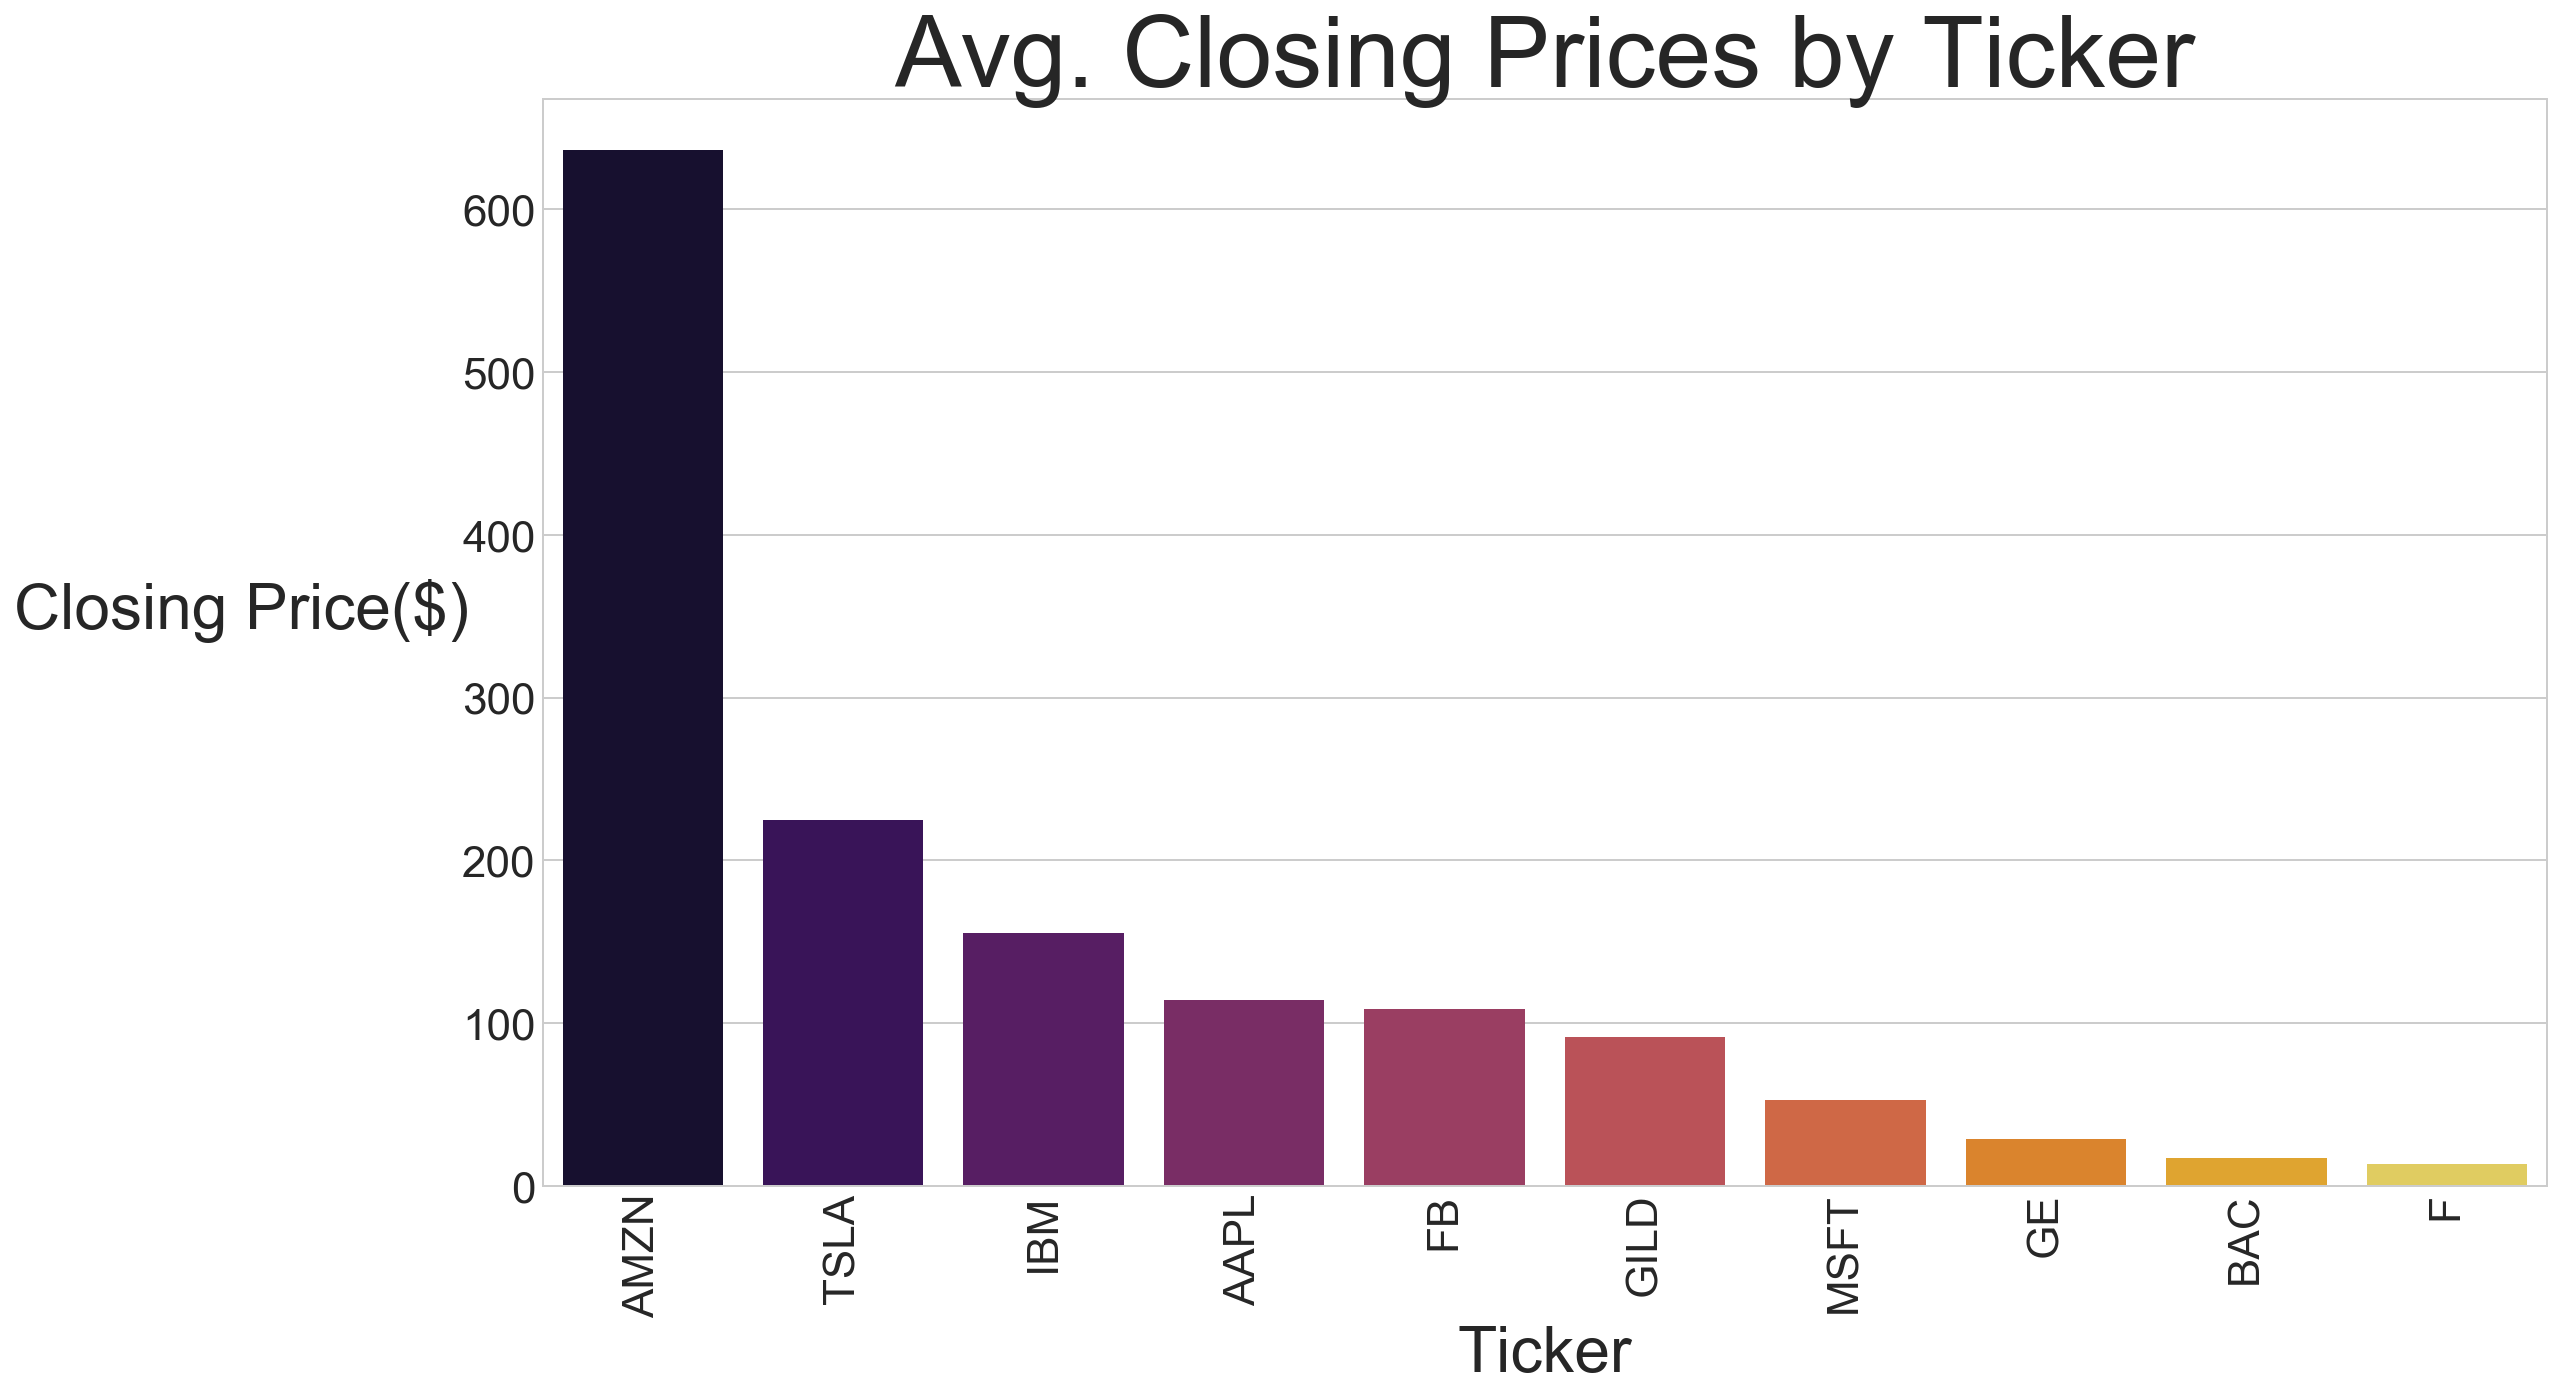

In [18]:
# Plotting bar graph to viaualiza

plt.figure(figsize=(16,10))
sns.barplot(x=avg_close.index,
            y=avg_close.values,
            palette='inferno')


plt.xlabel('Ticker',fontsize=32)
plt.ylabel('Closing Price($)',fontsize=32,rotation=0,labelpad=110)
plt.title('Avg. Closing Prices by Ticker',fontsize=50)
plt.xticks(fontsize=22,rotation=90)
plt.yticks(fontsize=22)

### Are closing prices higher certain times of the year?
- Not all too familiar to stock trading, it was interesting to see that overall closing prices decline steadily throughout the year.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text yticklabel objects>)

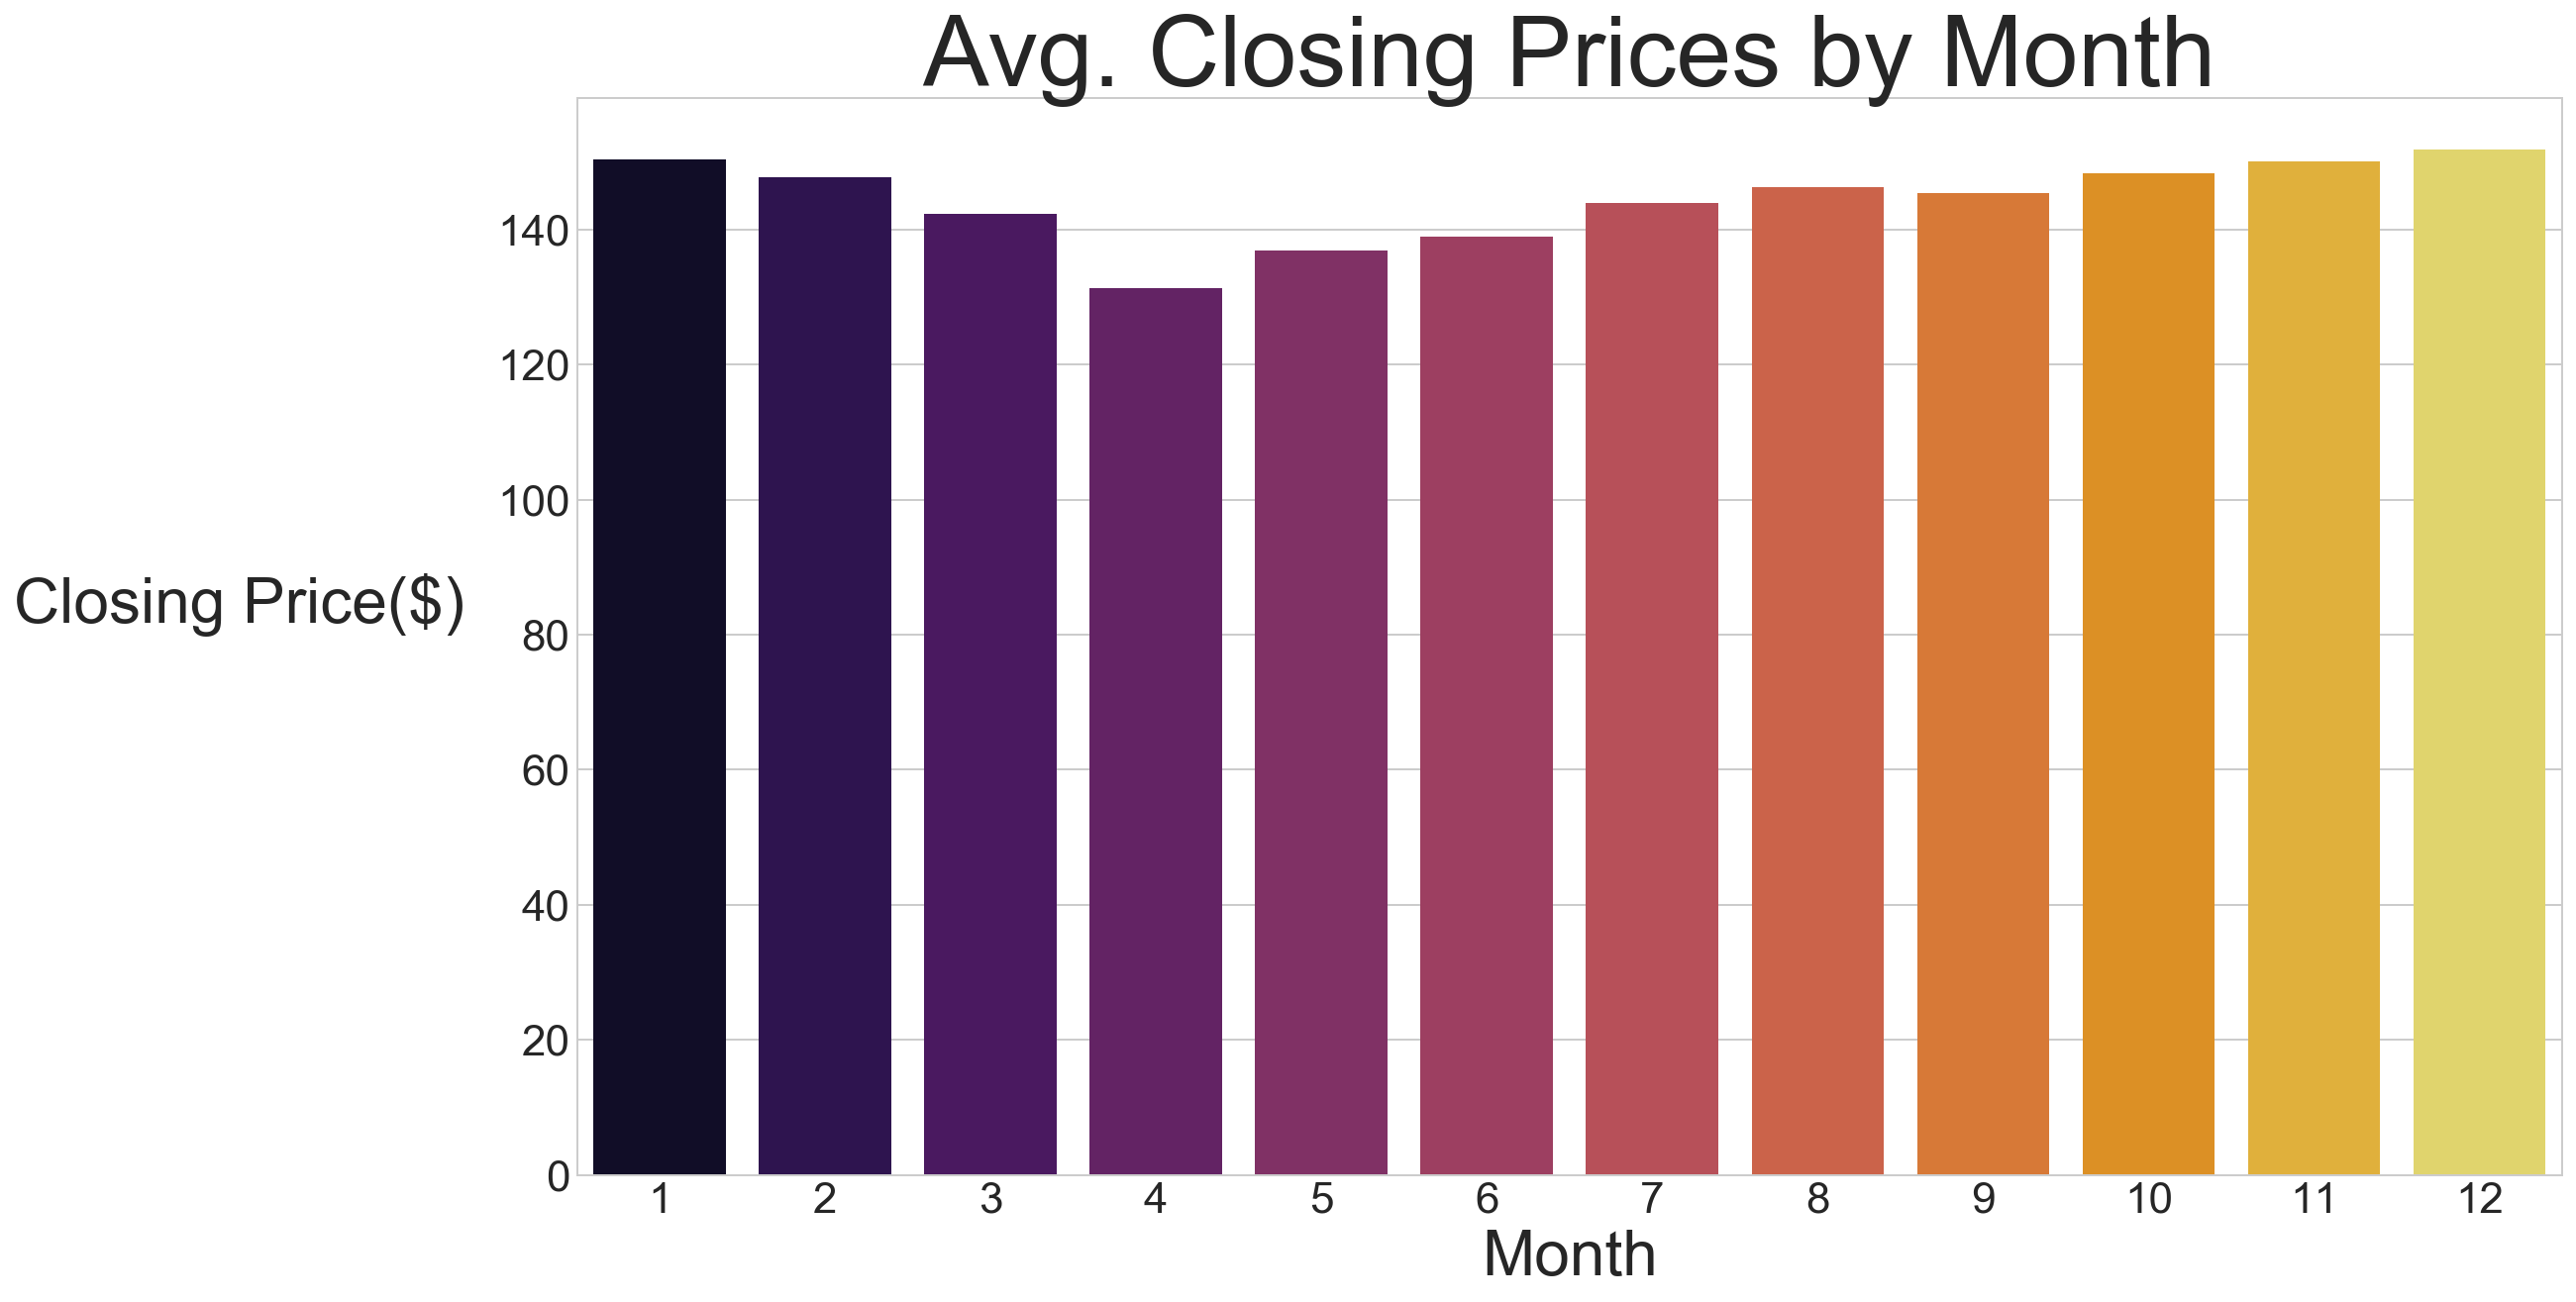

In [19]:
monthly_close = stocks.groupby('Month')['Close'].mean()

# Bar graph to visualize monthly articles

plt.figure(figsize=(16,10))
sns.barplot(x=monthly_close.index,
            y=monthly_close.values,
            palette='inferno')


plt.xlabel('Month',fontsize=32)
plt.ylabel('Closing Price($)',fontsize=32,rotation=0,labelpad=130)
plt.title('Avg. Closing Prices by Month',fontsize=50)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

### _Investigating Actual Market Performace - Performance of Long/Short Portfolios Over Past Year_
---
### Long Portfolio 

In [33]:
# Subsetting "Stocks" to only include data on 'Tickers' in Long Portfolio 

long = stocks[stocks['Tickers'].isin(long_portfolio['Tickers'].tolist())].reset_index(drop=True)

In [34]:
# Transforming subset into pivot tables- indexing on 'Week' and 'Tickers'

long_pivot = long.pivot_table('Close', index='Week', columns='Tickers')
long_pivot.head(3)  # Inspecting head

Tickers,AAPL,AMZN,BAC,F,FB,GE,GILD,IBM,MSFT,TSLA
Week,,,,,,,,,,
1,107.651110,689.523329,18.942222,13.036667,109.200001,30.626667,88.034445,149.571111,57.602222,221.363332
2,108.866999,700.324005,18.946000,12.535000,111.596001,30.006000,84.204999,149.644998,57.458000,218.751999
3,108.867500,694.027496,18.087500,12.226250,111.511251,29.695000,80.971252,145.928751,56.773750,221.046250


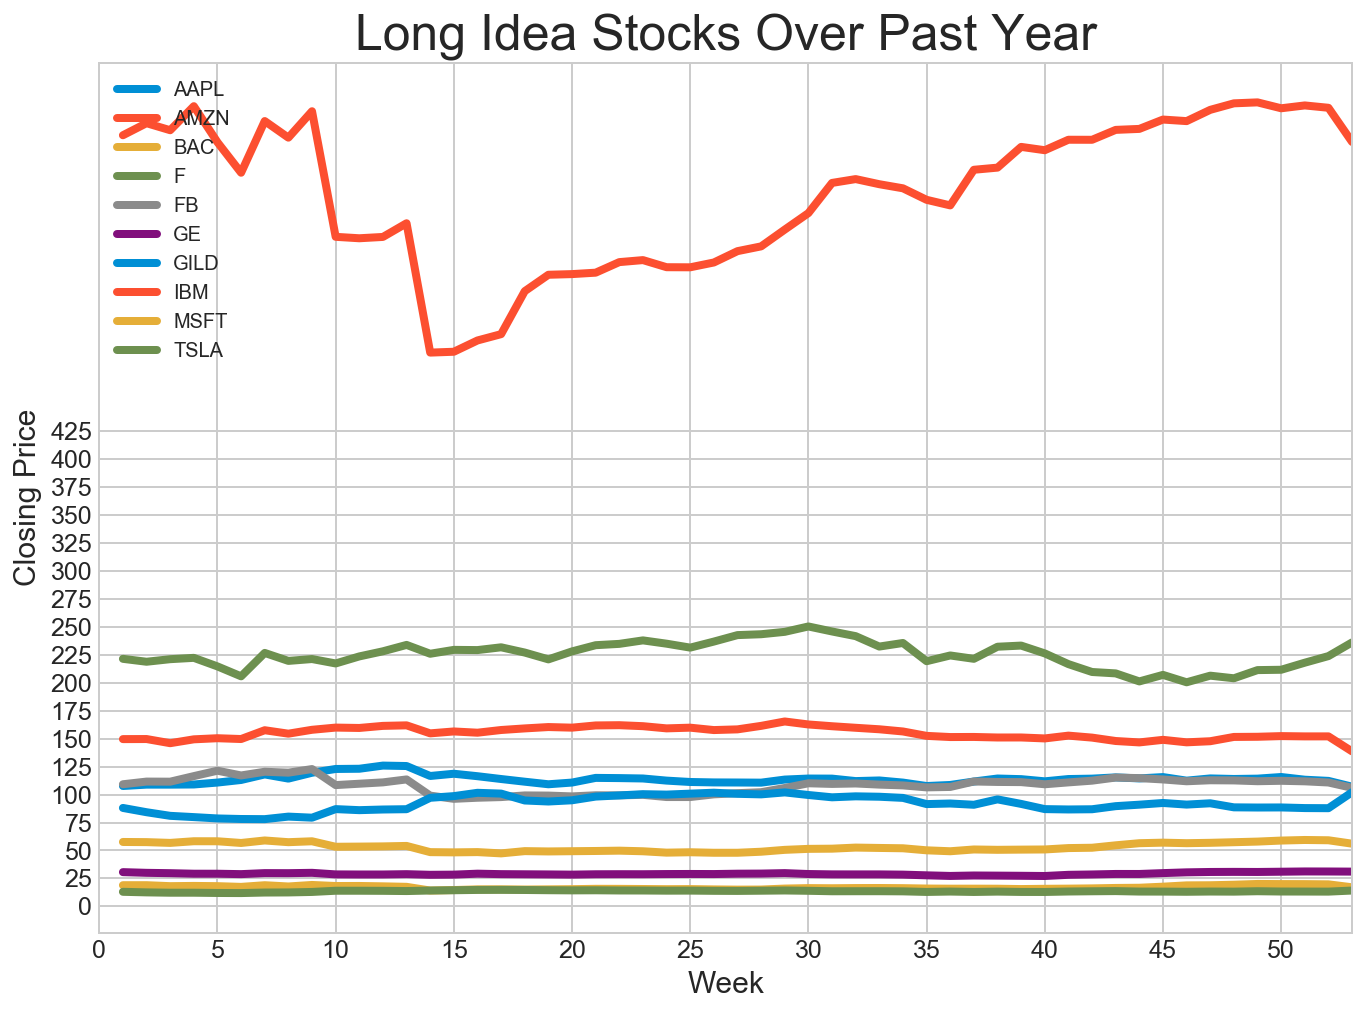

In [40]:
# Plotting the results to visualize 

fig, ax = plt.subplots(figsize=(10,8))
long_pivot.plot(ax=ax, 
                 yticks=(np.arange(0,440,step=25)),
                 xticks=(np.arange(0,52,step=5)));
plt.xlabel('Week',fontsize= 15)
plt.xticks(fontsize=12.5)
plt.ylabel('Closing Price',fontsize=15)
plt.yticks(fontsize=12.5)
plt.title('Long Idea Stocks Over Past Year',fontsize=25)
plt.legend(loc='upper left')

### Short Portfolio 

In [36]:
# Subsetting "Stocks" to only include data on 'Tickers' in Short Portfolio 

short = stocks[stocks['Tickers'].isin(short_portfolio['Tickers'].tolist())].reset_index(drop=True)

In [37]:
# Transforming subset into pivot tables- indexing on 'Week' and 'Tickers'

short_pivot = short.pivot_table('Close', index='Week', columns='Tickers')
short_pivot.head(3)  # Inspecting head

Tickers,AAPL,AMZN,F,TSLA
Week,,,,
1,107.651110,689.523329,13.036667,221.363332
2,108.866999,700.324005,12.535000,218.751999
3,108.867500,694.027496,12.226250,221.046250


In [ ]:
# Plotting the results to visualize 

fig, ax = plt.subplots(figsize=(10,8))
short_pivot.plot(ax=ax, 
                 ylim=(0,500), yticks=(np.arange(0,450,step=25)),
                 xlim=(0,52),xticks=(np.arange(0,52,step=5)));
plt.xlabel('Week',fontsize= 15)
plt.xticks(fontsize=12.5)
plt.ylabel('Closing Price',fontsize=15)
plt.yticks(fontsize=12.5)
plt.title('Short Idea Stocks Over Past Year',fontsize=25)
plt.legend(loc='upper left')

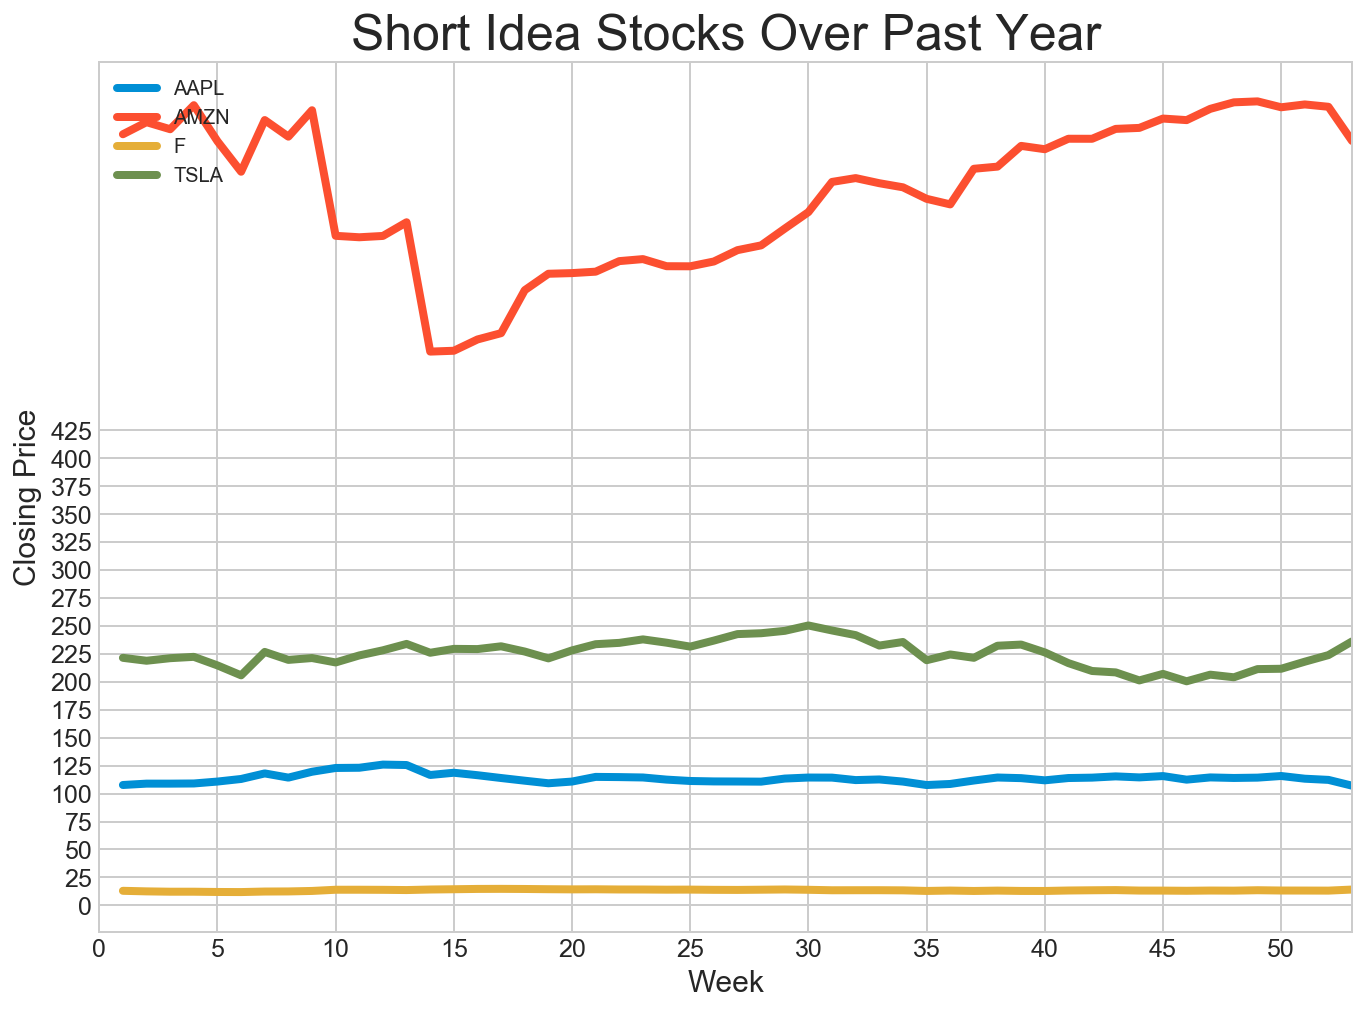

In [39]:
# Plotting the results to visualize 

fig, ax = plt.subplots(figsize=(10,8))
short_pivot.plot(ax=ax, yticks=(np.arange(0,450,step=25)), xticks=(np.arange(0,52,step=5)));
plt.xlabel('Week',fontsize= 15)
plt.xticks(fontsize=12.5)
plt.ylabel('Closing Price',fontsize=15)
plt.yticks(fontsize=12.5)
plt.title('Short Idea Stocks Over Past Year',fontsize=25)
plt.legend(loc='upper left')

---
## Saving Results - No DataFrames to Export 
---

## Onwards!
## Please proceed to Notebook 5 :)  